In [2]:
import pandas as pd
import numpy as np
import missingno as msno 
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
df= pd.read_csv('ORDirectUse.csv')

In [4]:
df.head()

,FeatureURI,Name,UTM_E,UTM_N,UTMDatumZone,LatDegree,LongDegree,SRS,LocationUncertaintyStatement,LocationUncertaintyCode,...,EnergyUseUnits,EnergyUseProcedure,LoadFactor,FacilityContact,PostalAddress,Zip,Phone,EMailAddress,Source,MetadataURI
0,OR_035_GFLR_01,"""Gone Fishing""|Liskey Ranch",604264.4476,4656429.144,10 T,42.053,-121.7400,EPSG:4326,lat/long from USGS Quadrangle/National Map Acc...,1.0,...,GWh/yr,unknown,0.80,Ron Barnes,"3875 Lower Klamath lake Rd. Klamath Falls, OR",97603,541 798-5202,NaN,"Geo-Heat Center, 2011. ""The Economic, Environm...",NaN
1,OR_037_SL_02,Summer Lake Aquaculture|\nDesert Springs Trout...,684815.8666,4762088.076,10 T,42.989,-120.7330,EPSG:4326,lat/long from USGS Quadrangle/National Map Acc...,1.0,...,GWh/yr,unknown,0.80,NaN,"P.O. Box 40\nSummer lake, OR",97640,541 943-3931\n541 943-3192,NaN,"Geo-Heat Center, 2011. ""The Economic, Environm...",NaN
2,OR_035_CKF_03,City of Klamath Falls,600541.2393,4675476.994,10 T,42.225,-121.7817,EPSG:4326,General City location \nlat/long from USGS Qua...,1.0,...,GWh/yr,unknown,0.25,NaN,"500 Klamath Ave.\nBox 237\nKlamath Falls, OR",97601,541 883-5316,NaN,"Geo-Heat Center, 2011. ""The Economic, Environm...",NaN
3,OR_035_OIT_04,Oregon Institute of Technology\nTechnology (OIT),600137.3371,4678914.044,10 T,42.256,-121.7860,EPSG:4326,lat/long from USGS Quadrangle/National Map Acc...,1.0,...,GWh/yr,unknown,0.25,NaN,"3201 Campus Dr.\nKlamath Falls, OR",97601,541 885-1691,NaN,"Geo-Heat Center, 2011. ""The Economic, Environm...",NaN
4,OR_061_CHS_05,Cove Hot Spring,436647.1178,5016261.918,11 T,45.297,-117.8080,EPSG:4326,General City location \nlat/long from USGS Qua...,1.0,...,GWh/yr,unknown,0.23,NaN,NaN,NaN,NaN,NaN,"Geo-Heat Center, 2011. ""The Economic, Environm...",NaN


<AxesSubplot:>

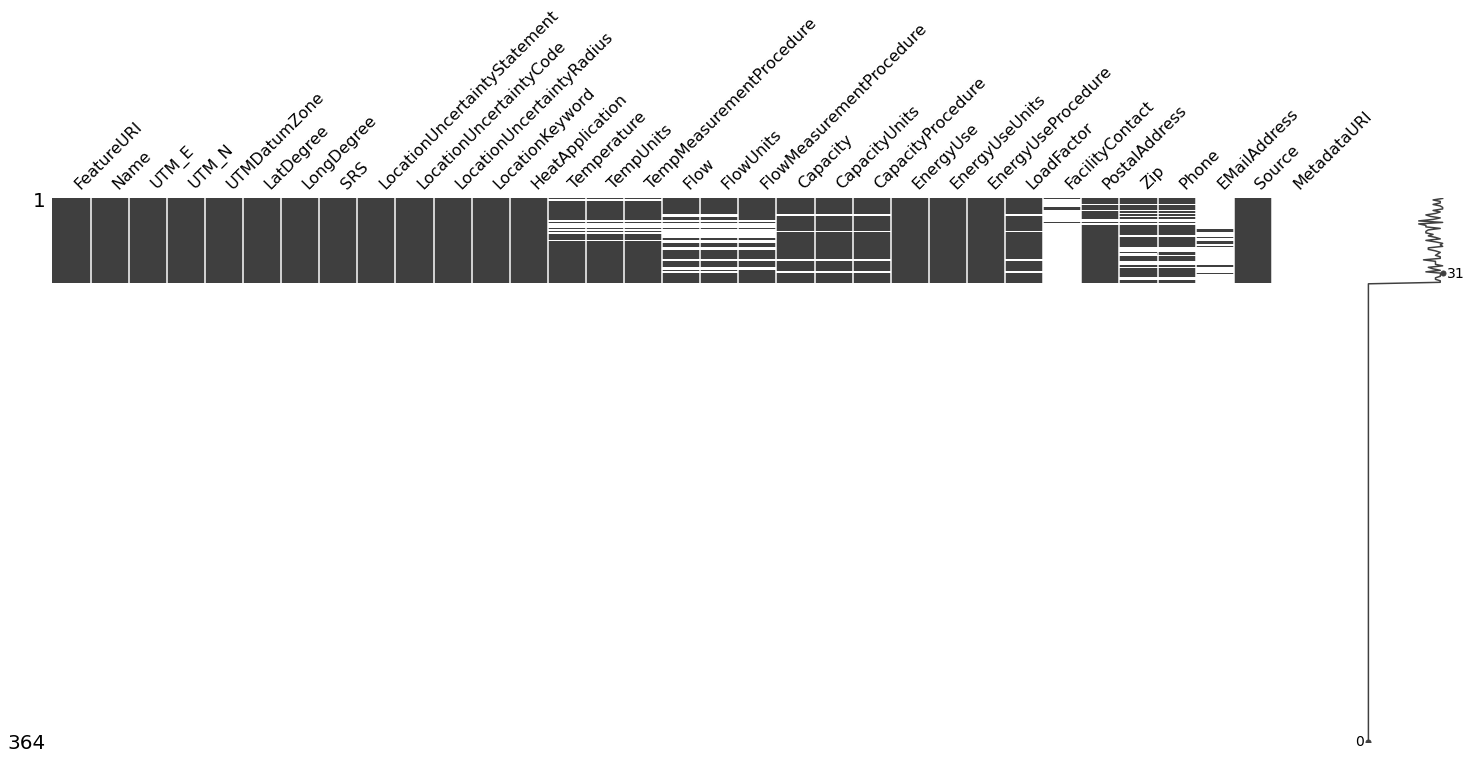

In [5]:
msno.matrix(df)

In [6]:
df.dtypes

FeatureURI                       object
Name                             object
UTM_E                           float64
UTM_N                           float64
UTMDatumZone                     object
LatDegree                       float64
LongDegree                      float64
SRS                              object
LocationUncertaintyStatement     object
LocationUncertaintyCode         float64
LocationUncertaintyRadius       float64
LocationKeyword                  object
HeatApplication                  object
Temperature                      object
TempUnits                        object
TempMeasurementProcedure         object
Flow                            float64
FlowUnits                        object
FlowMeasurementProcedure         object
Capacity                        float64
CapacityUnits                    object
CapacityProcedure                object
EnergyUse                       float64
EnergyUseUnits                   object
EnergyUseProcedure               object


In [7]:
df.index

RangeIndex(start=0, stop=364, step=1)

In [8]:
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource, Legend
from bokeh.models.tools import HoverTool
from bokeh.io import output_notebook

In [9]:
output_notebook()

Loading BokehJS ...

Text(0, 0.5, 'Size')

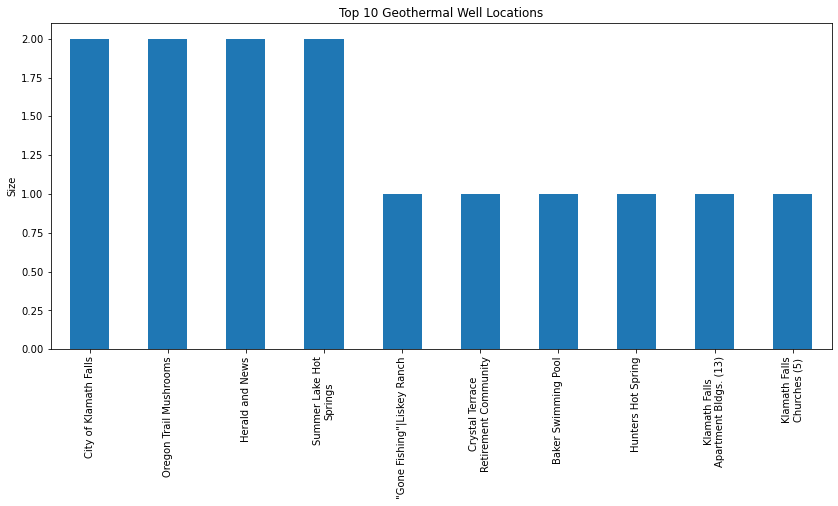

In [10]:
df['Name']. value_counts(). head(10). plot(kind= 'bar', title= 'Top 10 Geothermal Well Locations',x='Renewable System', y='', figsize=(14,6))
plt.ylabel('Size')

In [11]:
df['Name']. value_counts(). head(10)

City of Klamath Falls                    2
Oregon Trail Mushrooms                   2
Herald and News                          2
Summer Lake Hot\nSprings                 2
"Gone Fishing"|Liskey Ranch              1
Crystal Terrace\nRetirement Community    1
Baker Swimming Pool                      1
Hunters Hot Spring                       1
Klamath Falls\nApartment Bldgs. (13)     1
Klamath Falls\nChurches (5)              1
Name: Name, dtype: int64

<AxesSubplot:title={'center':'Zipcode Distribution of Geothermal Wells in Oregon'}, ylabel='Zip'>

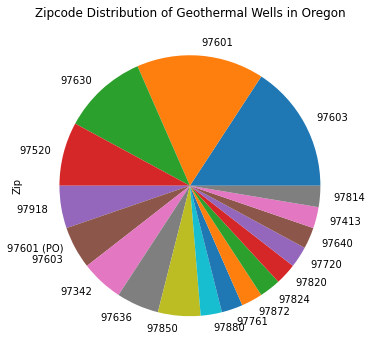

In [12]:
df['Zip']. value_counts(). plot(kind='pie', title= 'Zipcode Distribution of Geothermal Wells in Oregon', figsize=(6,6))

(array([42.,  4.,  2.,  1.,  3.,  0.,  0.,  0.,  0.,  1.]),
 array([ 0.03 ,  1.307,  2.584,  3.861,  5.138,  6.415,  7.692,  8.969,
        10.246, 11.523, 12.8  ]),
 <BarContainer object of 10 artists>)

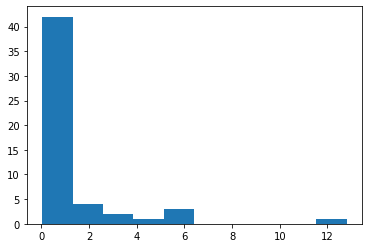

In [13]:
plt.hist(df['Capacity'])

(array([48.,  1.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([9.0000000e-04, 1.6384810e+01, 3.2768720e+01, 4.9152630e+01,
        6.5536540e+01, 8.1920450e+01, 9.8304360e+01, 1.1468827e+02,
        1.3107218e+02, 1.4745609e+02, 1.6384000e+02]),
 <BarContainer object of 10 artists>)

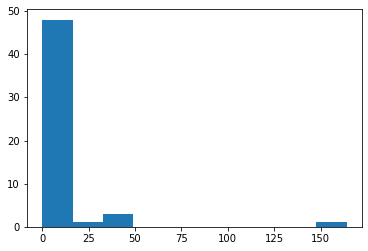

In [14]:
plt.hist(df['Capacity']**2)

Text(0.5, 1.0, 'Semi-log of Capacity')

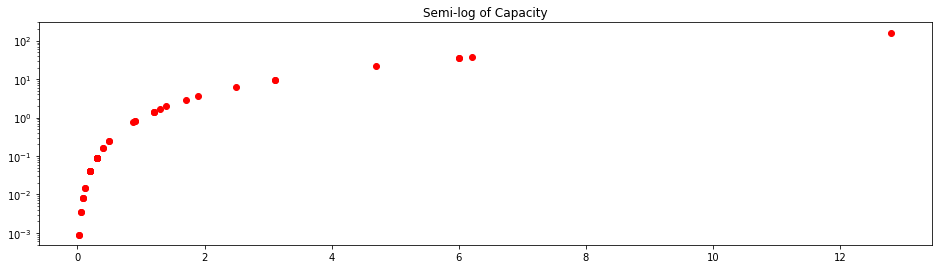

In [15]:
plt.figure(figsize = (16,9))
plt.subplot(2,1,1).semilogy(df['Capacity'],df['Capacity']**2, "or")
plt.title('Semi-log of Capacity')

Text(0.5, 1.0, 'Log-Log of Capacity')

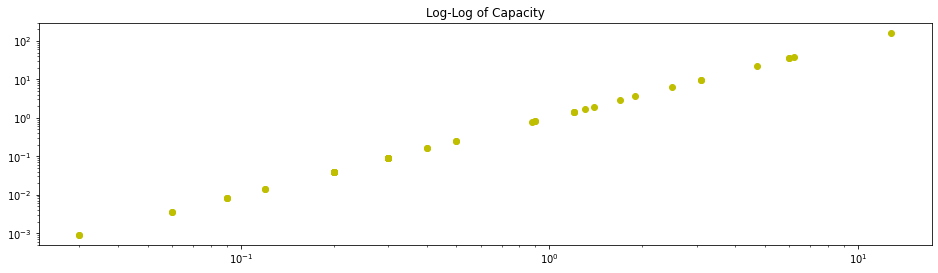

In [16]:
plt.figure(figsize = (16,9))
plt.subplot(2,1,2).loglog(df['Capacity'],df['Capacity']**2, "oy")
plt.title('Log-Log of Capacity')

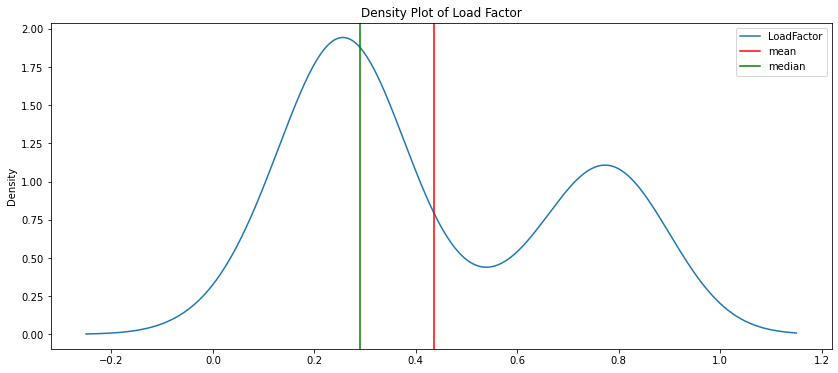

In [89]:
ax = df['LoadFactor'].plot(kind='density', title= 'Density Plot of Load Factor', figsize=(14,6))
ax.axvline(df['LoadFactor'].mean(), label= 'mean', color='red')
ax.axvline(df['LoadFactor'].median(), label= 'median', color='green')
ax.legend(loc='upper right')

In [39]:
df[['Zip', 'Flow', 'FlowUnits']]

,Zip,Flow,FlowUnits
0,97603,200.0,gpm
1,97640,200.0,gpm
2,97601,1000.0,gpm
3,97601,745.0,gpm
4,NaN,47.0,gpm
...,...,...,...
359,NaN,NaN,NaN
360,NaN,NaN,NaN
361,NaN,NaN,NaN
362,NaN,NaN,NaN


In [40]:
df.loc[df['Flow'] > 200]

,FeatureURI,Name,UTM_E,UTM_N,UTMDatumZone,LatDegree,LongDegree,SRS,LocationUncertaintyStatement,LocationUncertaintyCode,...,EnergyUseUnits,EnergyUseProcedure,LoadFactor,FacilityContact,PostalAddress,Zip,Phone,EMailAddress,Source,MetadataURI
2,OR_035_CKF_03,City of Klamath Falls,600541.2393,4675476.994,10 T,42.225,-121.7817,EPSG:4326,General City location \nlat/long from USGS Qua...,1.0,...,GWh/yr,unknown,0.25,NaN,"500 Klamath Ave.\nBox 237\nKlamath Falls, OR",97601,541 883-5316,NaN,"Geo-Heat Center, 2011. ""The Economic, Environm...",NaN
3,OR_035_OIT_04,Oregon Institute of Technology\nTechnology (OIT),600137.3371,4678914.044,10 T,42.256,-121.7860,EPSG:4326,lat/long from USGS Quadrangle/National Map Acc...,1.0,...,GWh/yr,unknown,0.25,NaN,"3201 Campus Dr.\nKlamath Falls, OR",97601,541 885-1691,NaN,"Geo-Heat Center, 2011. ""The Economic, Environm...",NaN
6,OR_035_LG_07,Liskey Greenhouses,604103.8451,4656093.608,10 T,42.050,-121.7420,EPSG:4326,lat/long from USGS Quadrangle/National Map Acc...,1.0,...,GWh/yr,unknown,0.30,Vicki Azcuenaga,"4650 Lower Klamath Lake Rd.\nKlamath Falls, OR",97603,541 798-5305 541 798 5770,NaN,"Geo-Heat Center, 2011. ""The Economic, Environm...",NaN
7,OR_037_TG_08,The Greenhouse,717471.8607,4677788.280,10 T,42.222,-120.3650,EPSG:4326,lat/long from USGS Quadrangle/National Map Acc...,1.0,...,GWh/yr,unknown,0.30,Andy Parker,"95709 Sunny Slope Ln. Lakeview, OR",97630,541 947-3923\n541 947-5152,NaN,"Geo-Heat Center, 2011. ""The Economic, Environm...",NaN
9,OR_045_OTM_56,Oregon Trail Mushrooms,480912.7918,4869901.243,11 T,43.982,-117.2380,EPSG:4326,General City location \nlat/long from USGS Qua...,1.0,...,GWh/yr,unknown,0.30,NaN,"Rt. 3, Box 4397\nVale, OR",97918,541 473-3103,NaN,http://geoheat.oit.edu/directuse/all/dui0194.h...,NaN
10,OR_035_CKF_10,City of Klamath Falls,600541.2393,4675476.994,10 T,42.225,-121.7817,EPSG:4326,General City lat/long from USGS Quadrangle/Nat...,1.0,...,GWh/yr,unknown,0.10,NaN,"Klamath Falls, OR",NaN,NaN,NaN,"Geo-Heat Center, 2011. ""The Economic, Environm...",NaN
14,OR_005_AHS_14,Austin Hot Springs,578552.8799,4985544.790,10 T,45.019,-122.0030,EPSG:4326,lat/long from USGS Quadrangle/National Map Acc...,1.0,...,GWh/yr,unknown,0.57,NaN,NaN,NaN,NaN,NaN,"Geo-Heat Center, 2011. ""The Economic, Environm...",NaN
30,OR_065_KNT_30,Kah-nee-ta,642131.2761,4969084.393,10 T,44.861,-121.2010,EPSG:4326,lat/long from USGS Quadrangle/National Map Acc...,1.0,...,GWh/yr,unknown,0.70,NaN,P.O. Box 1240\nShipping:\n6823 Highway 8\nWarm...,97761,541 553-1112,fmosesahern@kahneeta.com,"Geo-Heat Center, 2011. ""The Economic, Environm...",NaN
36,OR_035_KCJ_36,Klamath County Jail,603327.2959,4675184.201,10 T,42.222,-121.7480,EPSG:4326,lat/long from USGS Quadrangle/National Map Acc...,1.0,...,GWh/yr,unknown,0.25,NaN,"3300 Vanderberg Rd\nKlamath Falls, OR",97603,541 883-5130,NaN,"Geo-Heat Center, 2011. ""The Economic, Environm...",NaN
39,OR_035_MIO_39,Maywood Industries of\nOregon,602359.5315,4673615.221,10 T,42.208,-121.7600,EPSG:4326,lat/long from USGS Quadrangle/National Map Acc...,1.0,...,GWh/yr,unknown,0.26,NaN,"2350 Maywood Dr.\nKlamath Falls, OR",97603,541 883-5366,NaN,"Geo-Heat Center, 2011. ""The Economic, Environm...",NaN


In [41]:
df.loc[df['Flow'] > 500]

,FeatureURI,Name,UTM_E,UTM_N,UTMDatumZone,LatDegree,LongDegree,SRS,LocationUncertaintyStatement,LocationUncertaintyCode,...,EnergyUseUnits,EnergyUseProcedure,LoadFactor,FacilityContact,PostalAddress,Zip,Phone,EMailAddress,Source,MetadataURI
2,OR_035_CKF_03,City of Klamath Falls,600541.2393,4675476.994,10 T,42.225,-121.7817,EPSG:4326,General City location \nlat/long from USGS Qua...,1.0,...,GWh/yr,unknown,0.25,NaN,"500 Klamath Ave.\nBox 237\nKlamath Falls, OR",97601,541 883-5316,NaN,"Geo-Heat Center, 2011. ""The Economic, Environm...",NaN
3,OR_035_OIT_04,Oregon Institute of Technology\nTechnology (OIT),600137.3371,4678914.044,10 T,42.256,-121.7860,EPSG:4326,lat/long from USGS Quadrangle/National Map Acc...,1.0,...,GWh/yr,unknown,0.25,NaN,"3201 Campus Dr.\nKlamath Falls, OR",97601,541 885-1691,NaN,"Geo-Heat Center, 2011. ""The Economic, Environm...",NaN
36,OR_035_KCJ_36,Klamath County Jail,603327.2959,4675184.201,10 T,42.222,-121.7480,EPSG:4326,lat/long from USGS Quadrangle/National Map Acc...,1.0,...,GWh/yr,unknown,0.25,NaN,"3300 Vanderberg Rd\nKlamath Falls, OR",97603,541 883-5130,NaN,"Geo-Heat Center, 2011. ""The Economic, Environm...",NaN
50,OR_047_BHS_50,Breitenbush Hot\nSprings,581013.7571,4959133.002,10 T,44.781,-121.9760,EPSG:4326,lat/long from USGS Quadrangle/National Map Acc...,1.0,...,GWh/yr,unknown,0.37,NaN,"P.O. Box \nDetroit, OR 97342",97342,503 854-3314\n503 854-3320,office@breitenbush.com,"Geo-Heat Center, 2011. ""The Economic, Environm...",NaN
51,OR_061_HLRV_51,Hot Lake RV Park,423875.7005,5010625.255,11 T,45.245,-117.9700,EPSG:4326,lat/long from USGS Quadrangle/National Map Acc...,1.0,...,GWh/yr,unknown,0.23,NaN,"65182 Hot Lake Lane\nLa Grande, OR",97850,541 963-5253,NaN,"Geo-Heat Center, 2011. ""The Economic, Environm...",NaN


In [42]:
df.loc[df['Flow'] > 900]

,FeatureURI,Name,UTM_E,UTM_N,UTMDatumZone,LatDegree,LongDegree,SRS,LocationUncertaintyStatement,LocationUncertaintyCode,...,EnergyUseUnits,EnergyUseProcedure,LoadFactor,FacilityContact,PostalAddress,Zip,Phone,EMailAddress,Source,MetadataURI
2,OR_035_CKF_03,City of Klamath Falls,600541.2393,4675476.994,10 T,42.225,-121.7817,EPSG:4326,General City location \nlat/long from USGS Qua...,1.0,...,GWh/yr,unknown,0.25,NaN,"500 Klamath Ave.\nBox 237\nKlamath Falls, OR",97601,541 883-5316,NaN,"Geo-Heat Center, 2011. ""The Economic, Environm...",NaN


In [43]:
df.loc[df['Flow'] > 900, ['Flow', 'FlowUnits']]

,Flow,FlowUnits
2,1000.0,gpm


<AxesSubplot:title={'center':'Distribution of Energy Use From Geothermal Wells'}, ylabel='HeatApplication'>

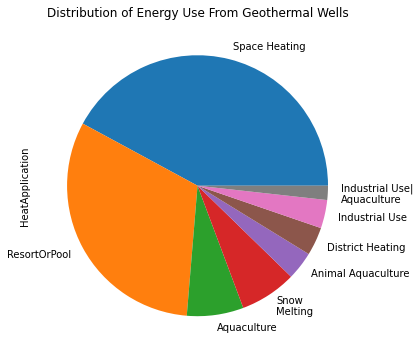

In [44]:
df['HeatApplication']. value_counts(). plot(kind='pie', title= 'Distribution of Energy Use From Geothermal Wells', figsize=(6,6))

In [45]:
df[['Name', 'Zip', 'HeatApplication']]. head(20)

,Name,Zip,HeatApplication
0,"""Gone Fishing""|Liskey Ranch",97603,Animal Aquaculture
1,Summer Lake Aquaculture|\nDesert Springs Trout...,97640,Animal Aquaculture
2,City of Klamath Falls,97601,District Heating
3,Oregon Institute of Technology\nTechnology (OIT),97601,District Heating
4,Cove Hot Spring,NaN,Aquaculture
5,Jackson Greenhouses,97520,Aquaculture
6,Liskey Greenhouses,97603,Aquaculture
7,The Greenhouse,97630,Aquaculture
8,Ag Dryers,NaN,Industrial Use|\nAquaculture
9,Oregon Trail Mushrooms,97918,Industrial Use


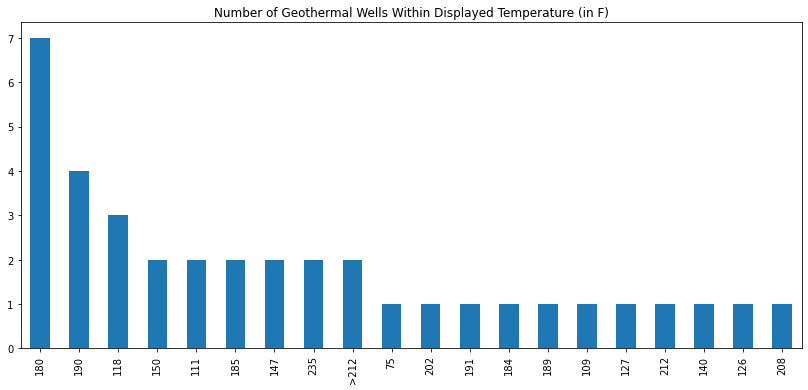

In [15]:
wells = df['Temperature']. value_counts(). head(20). plot(kind= 'bar', title= 'Number of Geothermal Wells Within Displayed Temperature (in F)',x='Zip', y='Temperature', figsize=(14,6))

In [26]:
Capacity = df['Capacity']

In [27]:
Lat = df['LatDegree']

In [28]:
Capacity.min(), Capacity.max()

(0.03, 12.8)

In [43]:
df= pd.read_csv('Focus_lat.csv')

In [44]:
Cap1 = df['Capacity']

In [46]:
Cap1.describe()

count    26.000000
mean      1.709615
std       2.740583
min       0.030000
25%       0.200000
50%       0.700000
75%       1.850000
max      12.800000
Name: Capacity, dtype: float64

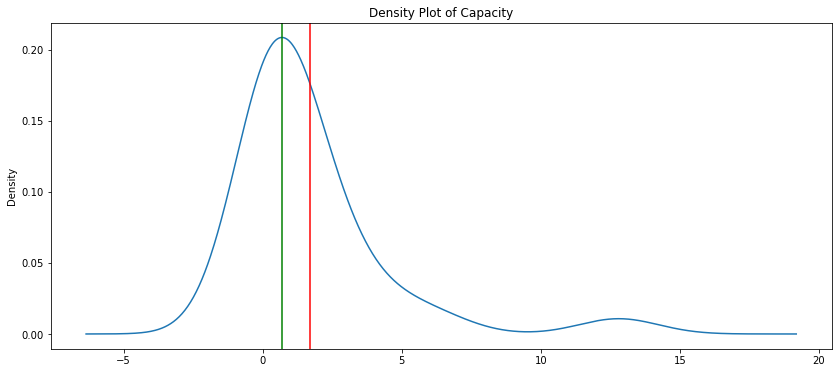

In [47]:
ax = df['Capacity'].plot(kind='density', title= 'Density Plot of Capacity', figsize=(14,6))
ax.axvline(df['Capacity'].mean(), color='red')
ax.axvline(df['Capacity'].median(), color='green')

In [42]:
Focus_lat = df.loc[df['LatDegree'] < 42.5]
df.loc[df['LatDegree'] < 42.5]

,FeatureURI,Name,UTM_E,UTM_N,UTMDatumZone,LatDegree,LongDegree,SRS,LocationUncertaintyStatement,LocationUncertaintyCode,...,EnergyUseUnits,EnergyUseProcedure,LoadFactor,FacilityContact,PostalAddress,Zip,Phone,EMailAddress,Source,MetadataURI
0,OR_035_GFLR_01,"""Gone Fishing""|Liskey Ranch",604264.4476,4656429.144,10 T,42.053,-121.7400,EPSG:4326,lat/long from USGS Quadrangle/National Map Acc...,1.0,...,GWh/yr,unknown,0.80,Ron Barnes,"3875 Lower Klamath lake Rd. Klamath Falls, OR",97603,541 798-5202,NaN,"Geo-Heat Center, 2011. ""The Economic, Environm...",NaN
2,OR_035_CKF_03,City of Klamath Falls,600541.2393,4675476.994,10 T,42.225,-121.7817,EPSG:4326,General City location \nlat/long from USGS Qua...,1.0,...,GWh/yr,unknown,0.25,NaN,"500 Klamath Ave.\nBox 237\nKlamath Falls, OR",97601,541 883-5316,NaN,"Geo-Heat Center, 2011. ""The Economic, Environm...",NaN
3,OR_035_OIT_04,Oregon Institute of Technology\nTechnology (OIT),600137.3371,4678914.044,10 T,42.256,-121.7860,EPSG:4326,lat/long from USGS Quadrangle/National Map Acc...,1.0,...,GWh/yr,unknown,0.25,NaN,"3201 Campus Dr.\nKlamath Falls, OR",97601,541 885-1691,NaN,"Geo-Heat Center, 2011. ""The Economic, Environm...",NaN
5,OR_029_JG_06,Jackson Greenhouses,524192.1108,4671246.796,10 T,42.193,-122.7070,EPSG:4326,General City location \nlat/long from USGS Qua...,1.0,...,GWh/yr,unknown,0.19,NaN,"2253 Hwy 99 North Ashland, OR",97520,541 482 3776,NaN,"Geo-Heat Center, 2011. ""The Economic, Environm...",NaN
6,OR_035_LG_07,Liskey Greenhouses,604103.8451,4656093.608,10 T,42.050,-121.7420,EPSG:4326,lat/long from USGS Quadrangle/National Map Acc...,1.0,...,GWh/yr,unknown,0.30,Vicki Azcuenaga,"4650 Lower Klamath Lake Rd.\nKlamath Falls, OR",97603,541 798-5305 541 798 5770,NaN,"Geo-Heat Center, 2011. ""The Economic, Environm...",NaN
7,OR_037_TG_08,The Greenhouse,717471.8607,4677788.280,10 T,42.222,-120.3650,EPSG:4326,lat/long from USGS Quadrangle/National Map Acc...,1.0,...,GWh/yr,unknown,0.30,Andy Parker,"95709 Sunny Slope Ln. Lakeview, OR",97630,541 947-3923\n541 947-5152,NaN,"Geo-Heat Center, 2011. ""The Economic, Environm...",NaN
10,OR_035_CKF_10,City of Klamath Falls,600541.2393,4675476.994,10 T,42.225,-121.7817,EPSG:4326,General City lat/long from USGS Quadrangle/Nat...,1.0,...,GWh/yr,unknown,0.10,NaN,"Klamath Falls, OR",NaN,NaN,NaN,"Geo-Heat Center, 2011. ""The Economic, Environm...",NaN
11,OR_035_HN_11,Herald and News,602660.5657,4675618.674,10 T,42.226,-121.7560,EPSG:4326,lat/long from USGS Quadrangle/National Map Acc...,1.0,...,GWh/yr,unknown,NaN,NaN,P.O. Box 788\n2701 Foothills Blvd.\nKlamath Fa...,97601 (PO)\n97603,541 885-4410,NaN,"Geo-Heat Center, 2011. ""The Economic, Environm...",NaN
12,OR_035_HD_12,Highway De-icing,600541.2393,4675476.994,10 T,42.225,-121.7817,EPSG:4326,General City lat/long from USGS Quadrangle/Nat...,1.0,...,GWh/yr,unknown,0.71,NaN,"Klamath Falls, OR",NaN,NaN,NaN,"Geo-Heat Center, 2011. ""The Economic, Environm...",NaN
13,OR_035_OIT_13,Oregon Institute of Technology (OIT)\nTechnolo...,600137.3371,4678914.044,10 T,42.256,-121.7860,EPSG:4326,lat/long from USGS Quadrangle/National Map Acc...,1.0,...,GWh/yr,unknown,0.11,NaN,"3201 Campus Dr.\nKlamath Falls, OR",97601,541 885-1691,NaN,"Geo-Heat Center, 2011. ""The Economic, Environm...",NaN


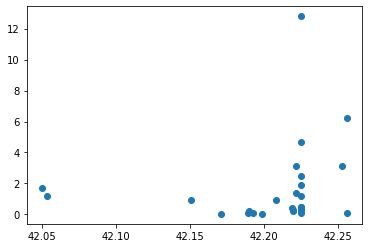

In [50]:
plt.scatter(df['LatDegree'],Cap1)

In [51]:
df['LatDegree']. value_counts(). head(10)

42.225    9
42.256    2
42.222    2
42.226    2
42.220    2
42.053    1
42.208    1
42.151    1
42.171    1
42.252    1
Name: LatDegree, dtype: int64

(array([17.,  4.,  2.,  1.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([ 0.03 ,  1.307,  2.584,  3.861,  5.138,  6.415,  7.692,  8.969,
        10.246, 11.523, 12.8  ]),
 <BarContainer object of 10 artists>)

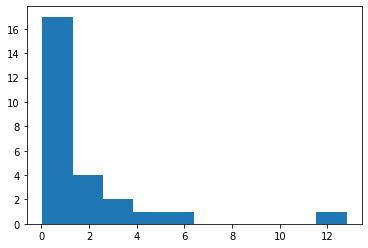

In [52]:
plt.hist(Cap1)

(array([23.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.]),
 array([9.00000000e-04, 1.09235067e+01, 2.18461133e+01, 3.27687200e+01,
        4.36913267e+01, 5.46139333e+01, 6.55365400e+01, 7.64591467e+01,
        8.73817533e+01, 9.83043600e+01, 1.09226967e+02, 1.20149573e+02,
        1.31072180e+02, 1.41994787e+02, 1.52917393e+02, 1.63840000e+02]),
 <BarContainer object of 15 artists>)

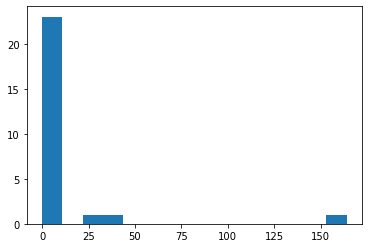

In [53]:
plt.hist(Cap1**2, bins = 15)

Text(0.5, 1.0, 'Semi-log of Capacity')

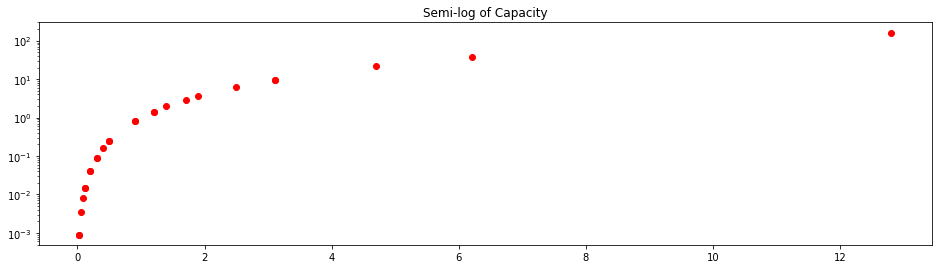

In [56]:
plt.figure(figsize = (16,9))
plt.subplot(2,1,1).semilogy(Cap1,Cap1**2, "or")
plt.title('Semi-log of Capacity')

Text(0.5, 1.0, 'Log-Log of Capacity')

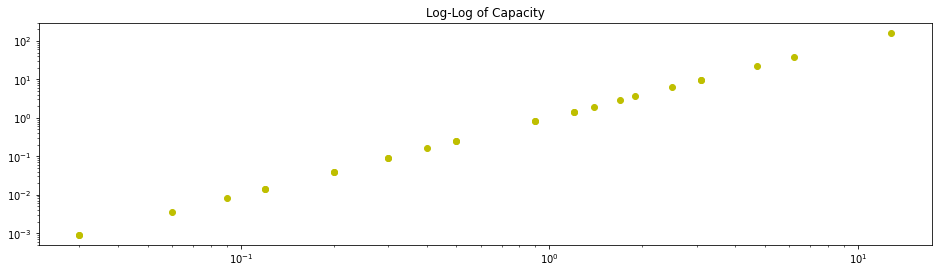

In [57]:
plt.figure(figsize = (16,9))
plt.subplot(2,1,2).loglog(Cap1,Cap1**2, "oy")
plt.title('Log-Log of Capacity')